# 워드클라우드 준비

In [1]:
import pandas as pd
import numpy as np
import os
import re

# 시각화를 위한 패키지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # '-' 깨짐 방지

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 깨짐 방지
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
%matplotlib inline

import seaborn as sns
# sns.set()

In [2]:
## konelpy 패키지 중 하나
import konlpy
from konlpy.tag import Twitter

## counter 단어 카운팅 패키지 
from collections import Counter
from wordcloud import WordCloud

from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
from IPython.display import set_matplotlib_formats
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
os.getcwd()

'C:\\workspace\\Python\\4-2) 핀테크 교육\\Final Project\\Project1'

In [4]:
os.chdir(r".\data\total")
os.getcwd()

'C:\\workspace\\Python\\4-2) 핀테크 교육\\Final Project\\Project1\\data\\total'

# 데이터 로딩

In [5]:
my_text=pd.read_excel("교양오락문화생활비.xlsx", encoding='CP949')
my_text.shape

(13738, 3)

# 전처리

In [6]:
my_text['title'].values[:10]

array(['김준호 유튜브 채널 구독자 38만명 돌파…뼈그맨 인증',
       '\'두데\' 감스트 "구독자들 \'야\'라고 불러…난 \'인직아\'라고 불린다"',
       '[뉴스레터 구독 이벤트] 1차 당첨자 추첨 과정 공개…100명의 행운의 주인공은...',
       '[MT리포트] "1년 수입 10억"…수백만 구독자 \'유튜버의 세계\'',
       'CJ E&M, ‘다이아 티비’ 구독자 1억 6000만명 돌파',
       "'슈가맨' '히든싱어' 등 음악예능 인기에…JTBC 유튜브 구독자 200만 돌파",
       "250만 구독자 '유튜버 망치'한국의 맛 알려",
       "[뉴스레터 구독 이벤트] RC카 '러커스'로 대리만족 한 번 해보시렵니까",
       "[뉴스레터 구독 이벤트] 1차를 놓쳤다면 'V30'가 기다리는 2차 이벤트에 도전",
       '250만 구독자 유튜버가 전하는 한국의 맛'], dtype=object)

In [7]:
no_meaning = "구독|책|핫플레이스|핫|플레이스|레이스|휴가비"
my_text_clean = []

for a_line in my_text['title'].values:
    a_line = re.sub('[^ㄱ-ㅣ가-힣0-9]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line) # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [8]:
my_text_clean[:10]

['김준호 유튜브 채널 자 38만명 돌파 뼈그맨 인증',
 ' 두데 감스트 자들 야 라고 불러 난 인직아 라고 불린다 ',
 ' 뉴스레터 이벤트 1차 당첨자 추첨 과정 공개 100명의 행운의 주인공은 ',
 ' 리포트 1년 수입 10억 수백만 자 유튜버의 세계 ',
 ' 다이아 티비 자 1억 6000만명 돌파',
 ' 슈가맨 히든싱어 등 음악예능 인기에 유튜브 자 200만 돌파',
 '250만 자 유튜버 망치 한국의 맛 알려',
 ' 뉴스레터 이벤트 카 러커스 로 대리만족 한 번 해보시렵니까',
 ' 뉴스레터 이벤트 1차를 놓쳤다면 30 가 기다리는 2차 이벤트에 도전',
 '250만 자 유튜버가 전하는 한국의 맛']

# 명사 추출

In [9]:
hannanum = konlpy.tag.Hannanum()

In [10]:
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)

In [11]:
# 단음절 제거
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

# 키워드 추출

In [12]:
# Series로 변환.
my_series = pd.Series(my_words_2)

In [13]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
#my_word_counts[:20]

# 워드클라우드 생성

## 교양오락문화생활비

In [14]:
# 워드클라우드 요구사항.
a_long_sentence = ' '.join(my_words_2)

In [15]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=1000)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.words_

In [16]:
for i, n in zip(wc.words_.keys(), range(1, 21)):
    print(n, "위 : ", i)

1 위 :  여행
2 위 :  맛집
3 위 :  정규직 전환
4 위 :  종합
5 위 :  오늘
6 위 :  서울
7 위 :  개최
8 위 :  부산
9 위 :  공개
10 위 :  올해
11 위 :  운영
12 위 :  제주
13 위 :  후보
14 위 :  세계
15 위 :  사람
16 위 :  선정
17 위 :  향기
18 위 :  한국
19 위 :  오픈
20 위 :  포토


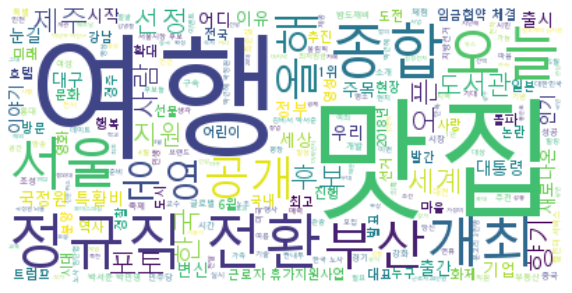

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

## 교통통신비

In [18]:
my_text = pd.read_excel("교통통신비.xlsx", encoding='CP949')
my_text.shape

(12150, 3)

In [19]:
no_meaning = "교통비|대중교통|통신비"
my_text_clean = []

for a_line in my_text['title'].values:
    a_line = re.sub('[^ ㄱ-ㅣ가-힣0-9]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line) # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [20]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출.
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)

In [21]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [22]:
# Series로 변환.
my_series = pd.Series(my_words_2)

# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
#my_word_counts[:20]

In [23]:
# 워드클라우드 요구사항.
a_long_sentence = ' '.join(my_words_2)

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=1000)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.words_

In [24]:
for i, n in zip(wc.words_.keys(), range(1, 21)):
    print(n, "위 : ", i)

1 위 :  지원
2 위 :  정부
3 위 :  보편요금제
4 위 :  이통사
5 위 :  추진
6 위 :  이용
7 위 :  종합
8 위 :  이통3사
9 위 :  최저임금 산입범위
10 위 :  서울 무료
11 위 :  출퇴근 무료
12 위 :  제주
13 위 :  공약
14 위 :  국회
15 위 :  가계 정책협의회
16 위 :  후보
17 위 :  혜택
18 위 :  서울시 미세먼지
19 위 :  논란
20 위 :  무료 미세먼지


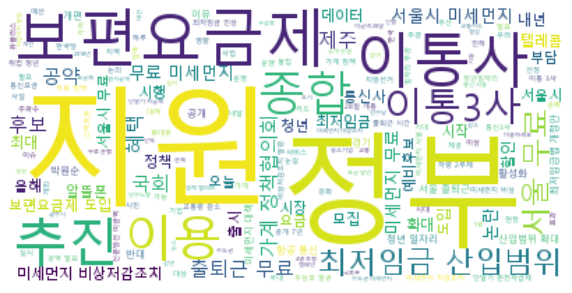

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

## 내구재비

In [26]:
my_text = pd.read_excel("내구재비.xlsx", encoding='CP949')
my_text.shape

(9643, 3)

In [27]:
no_meaning = "가전제품|가전|내구재|전자제품|전자"
my_text_clean = []

for a_line in my_text['title'].values:
    a_line = re.sub('[^ ㄱ-ㅣ가-힣0-9]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line) # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [28]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출.
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)

In [29]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [30]:
# Series로 변환.
my_series = pd.Series(my_words_2)

# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
#my_word_counts[:20]

In [31]:
# 워드클라우드 요구사항.
a_long_sentence = ' '.join(my_words_2)

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=1000)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.words_

In [32]:
for i, n in zip(wc.words_.keys(), range(1, 21)):
    print(n, "위 : ", i)

1 위 :  삼성
2 위 :  제품
3 위 :  종합
4 위 :  출시
5 위 :  시장 공략
6 위 :  신제품 출시
7 위 :  생산 소비
8 위 :  미세먼지
9 위 :  스마트폰
10 위 :  출시 삼성
11 위 :  프리미엄
12 위 :  공개
13 위 :  확대
14 위 :  수출
15 위 :  판매
16 위 :  성장
17 위 :  상승
18 위 :  1분기
19 위 :  증가
20 위 :  업계


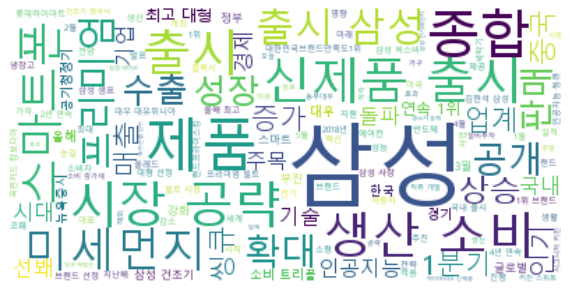

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

## 외식비

In [34]:
my_text = pd.read_excel("외식비.xlsx", encoding='CP949')
my_text.shape

(5180, 3)

In [35]:
no_meaning = "외식|외식비"
my_text_clean = []

for a_line in my_text['title'].values:
    a_line = re.sub('[^ ㄱ-ㅣ가-힣0-9]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line) # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [36]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출.
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)

In [37]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [38]:
# Series로 변환.
my_series = pd.Series(my_words_2)

# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
#my_word_counts[:20]

In [39]:
# 워드클라우드 요구사항.
a_long_sentence = ' '.join(my_words_2)

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=1000)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.words_

In [40]:
for i, n in zip(wc.words_.keys(), range(1, 21)):
    print(n, "위 : ", i)

1 위 :  업계
2 위 :  상승
3 위 :  최저임금 인상
4 위 :  메뉴
5 위 :  프랜차이즈
6 위 :  정부
7 위 :  업체
8 위 :  창업
9 위 :  가격 인상
10 위 :  최저임금
11 위 :  소비자
12 위 :  브랜드
13 위 :  서비스
14 위 :  지원
15 위 :  급등
16 위 :  개최
17 위 :  시장
18 위 :  대상
19 위 :  김밥
20 위 :  사업


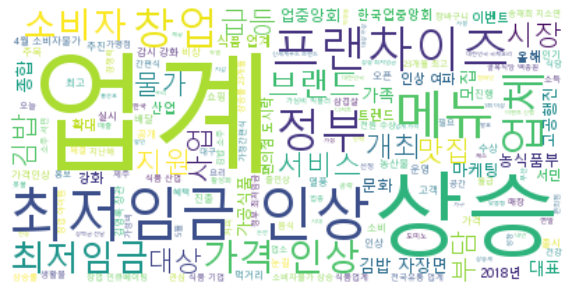

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

## 의료보건비

In [42]:
my_text = pd.read_excel("의료보건비.xlsx", encoding='CP949')
my_text.shape

(12000, 3)

In [43]:
no_meaning = "건강보험|건강|보험|의료|의료비"
my_text_clean = []

for a_line in my_text['title'].values:
    a_line = re.sub('[^ ㄱ-ㅣ가-힣0-9]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line) # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [44]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출.
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)

In [45]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [46]:
# Series로 변환.
my_series = pd.Series(my_words_2)

# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
#my_word_counts[:20]

In [47]:
# 워드클라우드 요구사항.
a_long_sentence = ' '.join(my_words_2)

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=1000)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.words_

In [48]:
for i, n in zip(wc.words_.keys(), range(1, 21)):
    print(n, "위 : ", i)

1 위 :  지원
2 위 :  문재 케어
3 위 :  보장성 강화
4 위 :  정부
5 위 :  국민
6 위 :  의협
7 위 :  환자
8 위 :  복지부
9 위 :  국민공단
10 위 :  병원비
11 위 :  추진
12 위 :  적용
13 위 :  공단
14 위 :  종합
15 위 :  확대
16 위 :  재무상담
17 위 :  건보공단
18 위 :  보장
19 위 :  부담
20 위 :  필요


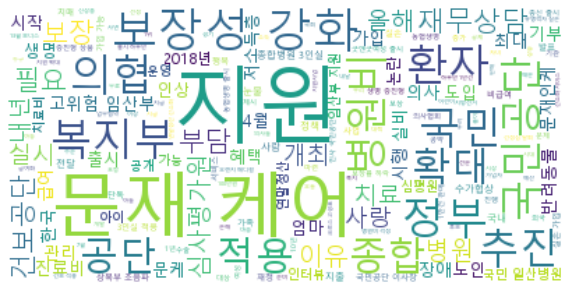

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

## 의류비

In [50]:
my_text = pd.read_excel("의류비.xlsx", encoding='CP949')
my_text.shape

(8000, 3)

In [51]:
no_meaning = "의류|패션"
my_text_clean = []

for a_line in my_text['title'].values:
    a_line = re.sub('[^ ㄱ-ㅣ가-힣0-9]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line) # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [52]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출.
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)

In [53]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [54]:
# Series로 변환.
my_series = pd.Series(my_words_2)

# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
#my_word_counts[:20]

In [55]:
# 워드클라우드 요구사항.
a_long_sentence = ' '.join(my_words_2)

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=1000)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.words_

In [56]:
for i, n in zip(wc.words_.keys(), range(1, 21)):
    print(n, "위 : ", i)

1 위 :  공항
2 위 :  포토
3 위 :  공항 포토
4 위 :  화보
5 위 :  브랜드
6 위 :  업계
7 위 :  여름
8 위 :  출시
9 위 :  개최
10 위 :  백화점
11 위 :  진행
12 위 :  최대 할인
13 위 :  눈길
14 위 :  롯데
15 위 :  사업
16 위 :  미세먼지
17 위 :  글로벌
18 위 :  업체
19 위 :  서울
20 위 :  모델


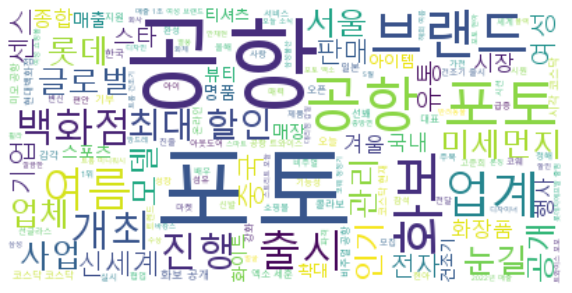

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()